In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[*********************100%***********************]  1 of 1 completed


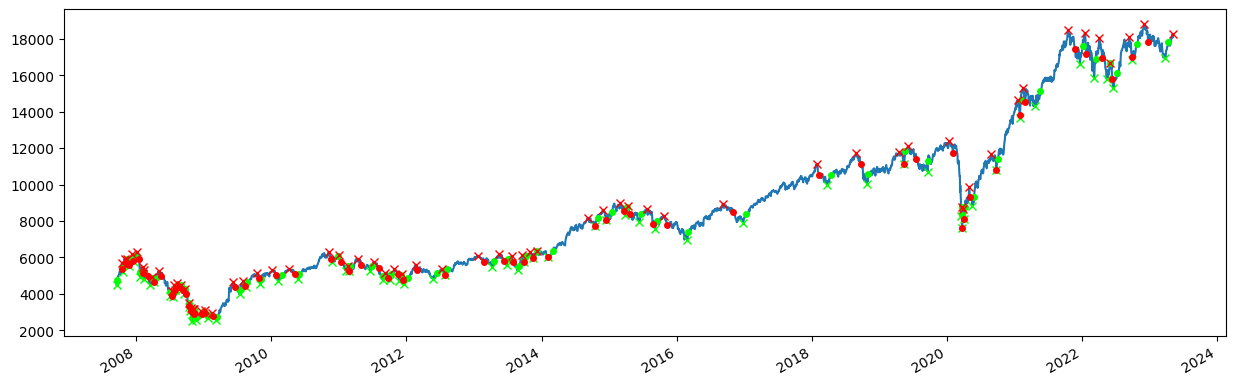

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

start = "2007-9-17"
df = yf.download(tickers="^NSEI", start=start, end = "2023-5-10")

df = df.reset_index()

max_drawdown = 5

x = len(df)
trend = ''
Peak = -np.inf
date_Peak = 0
Trough = np.inf
date_Trough = 0
ddd = np.empty((0, 3), np.datetime64)

for i in range(0, x):
    up = 0
    dn = 0
    if trend == '' or trend == 'bull':
        if df.loc[i, 'Close'] >= Peak:
            Peak = df.loc[i, 'Close']
            date_Peak = df.loc[i, 'Date']
    if trend == '' or trend == 'bear':
        if df.loc[i, 'Close'] <= Trough:
            Trough = df.loc[i, 'Close']
            date_Trough = df.loc[i, 'Date']
    if Peak != -np.inf:
        dn = (Peak - df.loc[df.index[i], 'Close']) / (Peak / 100.0)
    if Trough != np.inf:
        up = (df.loc[df.index[i], 'Close'] - Trough) / (Trough / 100.0)

    if up >= max_drawdown:
        trend = 'bull'
        ddd = np.append(ddd, np.array([[date_Trough, df.loc[i, 'Date'], 1]]), axis=0)
        Trough = np.inf
        Peak = df.loc[df.index[i], 'Close']
        date_Peak = df.loc[i, 'Date']
    if dn >= max_drawdown:
        trend = 'bear'
        ddd = np.append(ddd, np.array([[date_Peak, df.loc[i, 'Date'], 2]]), axis=0)
        Peak = -np.inf
        Trough = df.loc[df.index[i], 'Close']
        date_Trough = df.loc[i, 'Date']


df = df.set_index('Date')
up_trend_s = ddd[ddd[:, 2] == 1, 0]
up_trend_f = ddd[ddd[:, 2] == 1, 1]
dn_trend_s = ddd[ddd[:, 2] == 2, 0]
dn_trend_f = ddd[ddd[:, 2] == 2, 1]

if ddd[len(ddd) - 1, 2] == 1:#if the trend is growing, then we are looking for a local maximum
    ind = up_trend_f[len(up_trend_f) - 1]#get the index of the beginning of the bullish trend
    imax = df.loc[ind:, 'Close'].idxmax()#local maximum
    if df.loc[imax, 'Close'] > df.loc[ind, 'Close']:#if the high is greater than the price of the beginning of the bullish trend, then add a peak
        dn_trend_s = np.append(dn_trend_s, imax)
else:
    ind = dn_trend_f[len(dn_trend_f) - 1]#bear market
    imin = df.loc[ind:, 'Close'].idxmin()
    if df.loc[imin, 'Close'] < df.loc[ind, 'Close']:
        up_trend_s = np.append(up_trend_s, imin)


fig, ax = plt.subplots()
ax.plot(df.index, df['Close'])
ax.plot(up_trend_s, df.loc[up_trend_s, 'Close'], 'x', color='lime')
ax.plot(up_trend_f, df.loc[up_trend_f, 'Close'], 'o', color='lime', markersize=4)
ax.plot(dn_trend_s, df.loc[dn_trend_s, 'Close'], 'x', color='red')
ax.plot(dn_trend_f, df.loc[dn_trend_f, 'Close'], 'o', color='red', markersize=4)
fig.autofmt_xdate()
fig.set_figwidth(15)
plt.show()

In [ ]:
up_trend_s, up_trend_f, dn_trend_s, dn_trend_f

(array([Timestamp('2007-09-17 00:00:00'), Timestamp('2007-10-22 00:00:00'),
        Timestamp('2007-11-12 00:00:00'), Timestamp('2007-11-22 00:00:00'),
        Timestamp('2007-12-18 00:00:00'), Timestamp('2008-01-22 00:00:00'),
        Timestamp('2008-02-12 00:00:00'), Timestamp('2008-03-17 00:00:00'),
        Timestamp('2008-04-04 00:00:00'), Timestamp('2008-07-01 00:00:00'),
        Timestamp('2008-07-16 00:00:00'), Timestamp('2008-07-29 00:00:00'),
        Timestamp('2008-08-28 00:00:00'), Timestamp('2008-09-17 00:00:00'),
        Timestamp('2008-10-10 00:00:00'), Timestamp('2008-10-17 00:00:00'),
        Timestamp('2008-10-27 00:00:00'), Timestamp('2008-11-06 00:00:00'),
        Timestamp('2008-11-20 00:00:00'), Timestamp('2008-12-26 00:00:00'),
        Timestamp('2009-01-23 00:00:00'), Timestamp('2009-03-09 00:00:00'),
        Timestamp('2009-07-13 00:00:00'), Timestamp('2009-08-17 00:00:00'),
        Timestamp('2009-11-03 00:00:00'), Timestamp('2010-02-05 00:00:00'),
        Time